In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import SVG
from IPython.display import display
import scipy.stats as st
from subprocess import call
import matplotlib.pyplot as plt
%matplotlib inline

## Mamiraua Dataset Plot

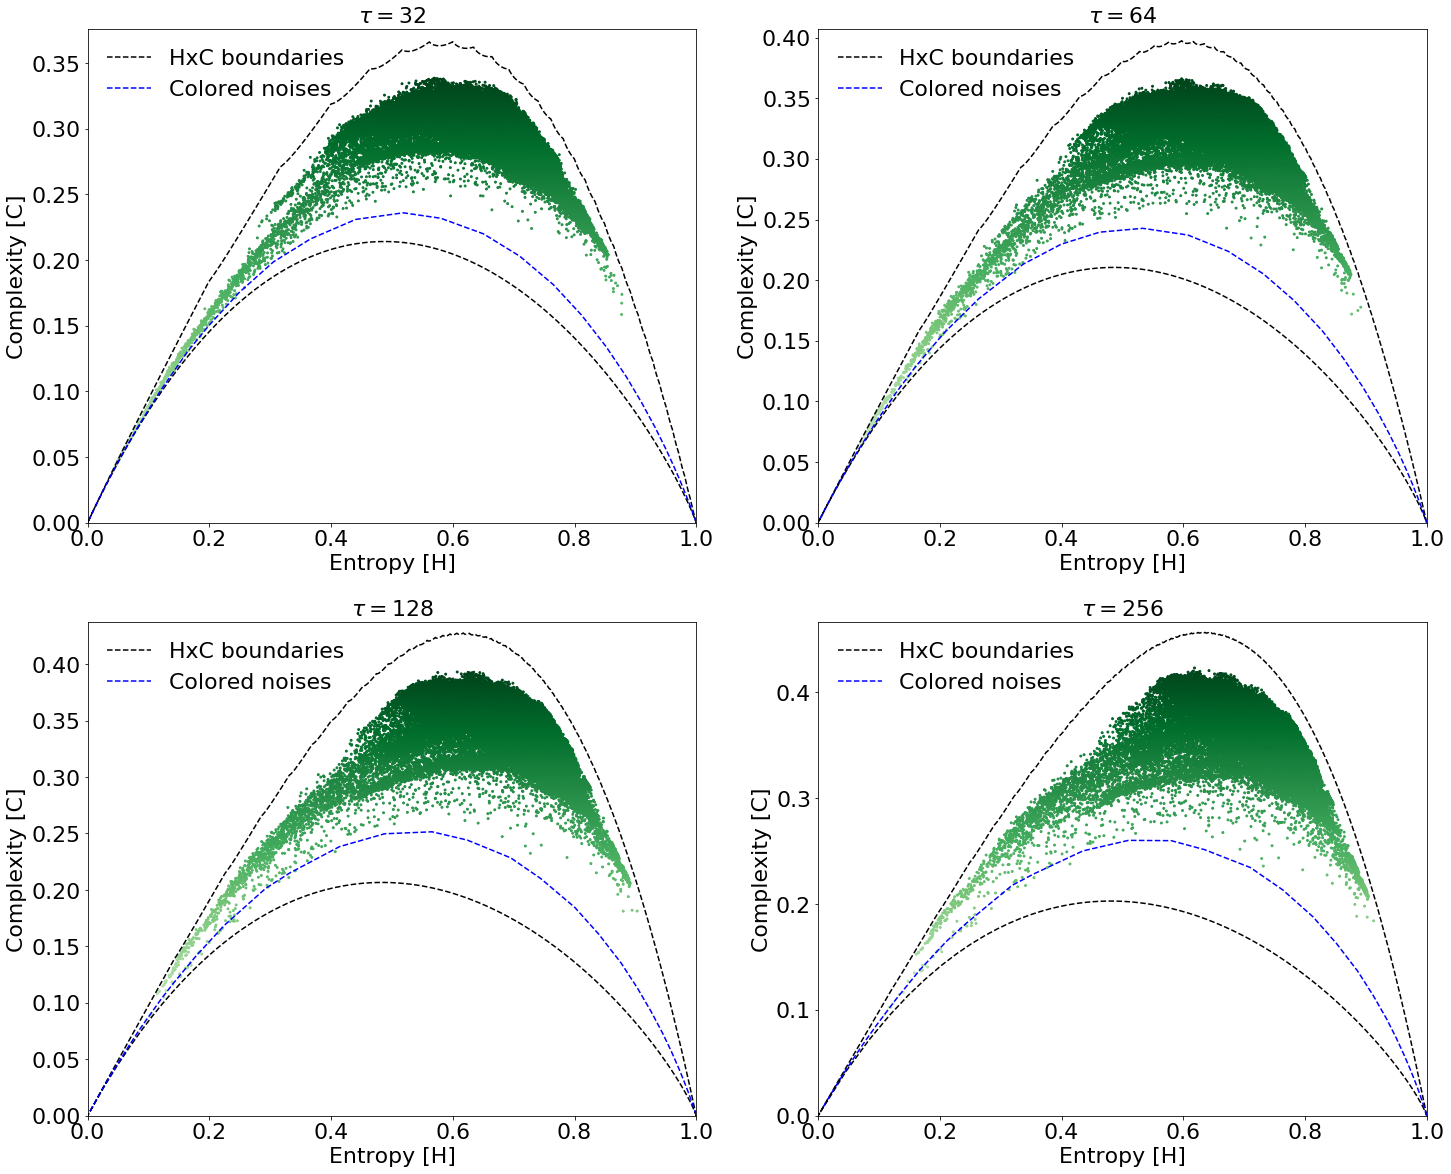

In [9]:
lags = [32, 64, 128, 256] 

plt.figure(figsize=(24,20))
plt.rc('font', size=22)
plt.rc('axes', titlesize=22)

for i, lag in enumerate(lags):
    base = pd.read_pickle('./pkl_datasets/mamiraua_dataset_ACF_' + str(lag) + '.gzip')
    cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
    noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

    plt.subplot(2,2,i+1)
    plt.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
    plt.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')
    plt.xlim([0, 1])
    plt.ylim([0, np.max(cotas['Complexity'])+0.01])
    plt.ylabel('Complexity [C]')
    plt.xlabel('Entropy [H]')
    plt.legend(loc = 'upper left', frameon=False)
    plt.scatter(base['H'], base['C'], marker='.', s=15, c=base['C'], 
                norm=plt.Normalize(vmax=np.max(base['C']), vmin=np.min(base['C'])-0.1),
                cmap = 'Greens') # seismic # viridis # plasma # jet # PuBu # YlOrRd # Blues
    plt.title(r'$\tau = $' + str(lags[i]))
    plt.rc('font', size=22)
    plt.rc('axes', titlesize=22)

plt.show()